### First import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#Read the RI island data in df
df=pd.read_csv("RI_data.csv")

C:\Users\Sabbir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Have a look at DataFrame
df.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [4]:
df.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

In [5]:
df.shape

(509681, 26)

In [6]:
# Check how many rows are null in every column
df.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

### Let's find our necessary Features from Dataframe

In [7]:
df=df[['stop_date', 'stop_time', 'driver_gender', 'driver_race', 'violation_raw',
       'violation','search_conducted','search_type', 'stop_outcome', 
       'is_arrested','stop_duration', 'drugs_related_stop', 'district']]

In [8]:
df.shape

(509681, 13)

<pre>                                   Half Of the columns are reduced !! </pre>

In [9]:
#Let's check again the null values for every column
df.isnull().sum()

stop_date                 10
stop_time                 10
driver_gender          29097
driver_race            29073
violation_raw          29073
violation              29073
search_conducted          10
search_type           491919
stop_outcome           29073
is_arrested            29073
stop_duration          29073
drugs_related_stop         0
district                   0
dtype: int64

In [10]:
df.isnull().sum()

stop_date                 10
stop_time                 10
driver_gender          29097
driver_race            29073
violation_raw          29073
violation              29073
search_conducted          10
search_type           491919
stop_outcome           29073
is_arrested            29073
stop_duration          29073
drugs_related_stop         0
district                   0
dtype: int64

<p> <b> *** Most of the columns missing around 30k observation. Let's drop all of those observations. </b> </p>

## drop 'driver_gender' column NaN values . i.e: subset=['driver_gender'] use in that case 

In [11]:
#using subset=['driver_gender'], because search_Type column contain most of null values(462822) and by default dropna delete 
# all rows contain NaN
df.dropna(subset=['driver_gender'], inplace=True)

In [12]:
# Let's now check the null values for all column. 
df.isnull().sum()

stop_date                  0
stop_time                  0
driver_gender              0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type           462822
stop_outcome               0
is_arrested                0
stop_duration              0
drugs_related_stop         0
district                   0
dtype: int64

In [13]:
# Check againg How many observation left ? 
df.shape

(480584, 13)

In [14]:
df.shape

(480584, 13)

### Let's hands getting dirty berofe going to deep dive

In [15]:
#check the all columns data type
df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted      object
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

<pre> <font color='red'> *** stop_date, stop_time columns are in Object !! </pre>

# Check 'is_arrested' column data type

In [16]:
df.is_arrested.dtype

dtype('O')

In [17]:
df['is_arrested'].head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

<p> True / False are in Object data type here </p>  

## Let's change it to boolean dtype using .astype() method

In [18]:
df['is_arrested'] = df.is_arrested.astype('bool')

In [19]:
df.is_arrested.dtype

dtype('bool')

In [20]:
df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted      object
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

# Concatenate 'stop_date' and 'stop_time' (separated by a space)


In [21]:
datetime = df.stop_date.str.cat(df.stop_time, sep=' ')

 # Convert to datetime format and make a new column stop_datetime


In [22]:
df['stop_datetime'] = pd.to_datetime(datetime)

In [23]:
df.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted              object
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

# Set 'stop_datetime' as the index. It will give a more convenient way to extract data 

In [24]:
df.set_index('stop_datetime', inplace=True)

In [25]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-02 01:55:00,2005-01-02,01:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
2005-01-02 20:30:00,2005-01-02,20:30,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone X4


## Let's count why police stopped car using  .value_counts() method

In [26]:
df.stop_outcome.value_counts()

Citation            428378
Warning              28840
Arrest Driver        14630
N/D                   3431
No Action             3332
Arrest Passenger      1973
Name: stop_outcome, dtype: int64

# .value_counts(normalize=True) gives percentage (%) instead of total counts 

In [27]:
df.stop_outcome.value_counts(normalize=True)

Citation            0.891370
Warning             0.060010
Arrest Driver       0.030442
N/D                 0.007139
No Action           0.006933
Arrest Passenger    0.004105
Name: stop_outcome, dtype: float64

In [28]:
#Make it more useful 
df.stop_outcome.value_counts(normalize=True).sort_values(ascending=False)*100

Citation            89.136967
Warning              6.001032
Arrest Driver        3.044213
N/D                  0.713923
No Action            0.693323
Arrest Passenger     0.410542
Name: stop_outcome, dtype: float64

# Find driver_race using .value_counts()

In [29]:
df.driver_race.value_counts()

White       344716
Black        68577
Hispanic     53123
Asian        12824
Other         1344
Name: driver_race, dtype: int64

In [30]:
# find another way for more spacific race. i.e:white
white=df[df.driver_race=='White']

In [31]:
white.shape

(344716, 13)

In [32]:
white.stop_outcome.value_counts(normalize=True)

Citation            0.902485
Warning             0.057427
Arrest Driver       0.023814
No Action           0.006724
N/D                 0.006568
Arrest Passenger    0.002982
Name: stop_outcome, dtype: float64

In [33]:
Asian=df[df.driver_race=='Asian']

In [34]:
Asian.stop_outcome.value_counts(normalize=True)

Citation            0.927792
Warning             0.041563
Arrest Driver       0.018013
No Action           0.005848
N/D                 0.004679
Arrest Passenger    0.002105
Name: stop_outcome, dtype: float64

## *** Asian driver received more Citation over White Driver but they are less warned. 

# Count the unique values in 'violation'

In [35]:
df.violation.value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

# Express the counts as proportions


In [36]:
print(df.violation.value_counts(normalize=True))

Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64


## 01. Do the genders commit different violations?

In [37]:
female=df[df['driver_gender']=='F']

In [38]:
female.shape

(131138, 13)

In [39]:
male=df[df['driver_gender']=='M']

In [40]:
male.shape

(349446, 13)

### Are Female violate more on Speeding  over man?

In [41]:
female.violation.value_counts(normalize=True)

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64

In [42]:
male.violation.value_counts(normalize=True)

Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64

### *** Female violate more on Speeding  over man </p>

## 02. Does gender affect who gets a ticket for speeding?


In [43]:
female_speeding=df[(df['driver_gender']=='F') & (df['violation']=='Speeding')]

In [44]:
female_speeding.shape

(86198, 13)

In [45]:
male_speeding=df[(df['driver_gender']=='M') & (df['violation']=='Speeding')]

In [46]:
male_speeding.shape

(182538, 13)

In [47]:
female_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64

In [48]:
male_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64

### *** No. Almost same for male and female who gets a ticket for speeding

### 03. Does gender affect whose vehicle is searched ?


In [49]:
df.is_arrested.value_counts(normalize=True)

False    0.965452
True     0.034548
Name: is_arrested, dtype: float64

In [50]:
# mean returns only the true value
df.is_arrested.mean()

0.03454755048024903

In [51]:
df.groupby('district').is_arrested.mean()

district
Zone K1    0.024051
Zone K2    0.028125
Zone K3    0.032020
Zone X1    0.026165
Zone X3    0.033355
Zone X4    0.047291
Name: is_arrested, dtype: float64

In [52]:
df.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.015374
          M                0.027779
Zone K2   F                0.019528
          M                0.031619
Zone K3   F                0.022614
          M                0.035451
Zone X1   F                0.020725
          M                0.027561
Zone X3   F                0.026076
          M                0.036446
Zone X4   F                0.038155
          M                0.050246
Name: is_arrested, dtype: float64

## Calculate the percentage of all stops that result in a vehicle search, also known as the  <b> search rate. </b>

In [53]:
df.search_conducted=df.search_conducted.astype('bool')

In [54]:
df.search_conducted.mean()


0.036959199640437465

In [55]:
# Groupby by driver_gender 
df.groupby('driver_gender').search_conducted.mean()*100

driver_gender
F    1.875124
M    4.379217
Name: search_conducted, dtype: float64

# Outcome of Search Rate: 
[<b> Average search rate </b> is 3.69%. While filter it by driver_gender, <b> Female drivers </b> are 1.87% time Searched and <b> Men drivers </b> are 4.37% time searched. More than average search rate and  more than Double of female drivers search rates also. ]

### Add violation factor to check, is it affect in search rate ?

In [56]:
df.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.040245
               Moving violation       0.038021
               Other                  0.045898
               Registration/plates    0.054700
               Seat belt              0.017746
               Speeding               0.007738
M              Equipment              0.070916
               Moving violation       0.059156
               Other                  0.046120
               Registration/plates    0.103589
               Seat belt              0.031705
               Speeding               0.026630
Name: search_conducted, dtype: float64

# Does gender affect who is frisked during a search?


In [57]:
df.search_conducted.value_counts()

False    462822
True      17762
Name: search_conducted, dtype: int64

In [58]:
df.search_type.value_counts(dropna=False)

NaN                                                         462822
Incident to Arrest                                            6998
Probable Cause                                                4989
Reasonable Suspicion                                          1141
Inventory                                                     1101
Protective Frisk                                               879
Incident to Arrest,Inventory                                   649
Incident to Arrest,Probable Cause                              552
Probable Cause,Reasonable Suspicion                            334
Probable Cause,Protective Frisk                                221
Incident to Arrest,Protective Frisk                            158
Incident to Arrest,Inventory,Probable Cause                    151
Inventory,Probable Cause                                       132
Protective Frisk,Reasonable Suspicion                           83
Incident to Arrest,Inventory,Protective Frisk                 

## Count all 'Protective Frisk' 

In [59]:
# Check if 'search_type' contains the string 'Protective Frisk'
# make a new column name frisk
df['frisk'] = df.search_type.str.contains('Protective Frisk', na=False)

# Take the sum of 'frisk'
df.frisk.sum()

1598

In [60]:
# Create a DataFrame of stops in which a search was conducted
searched = df[df.search_conducted==True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
searched.frisk.mean()



0.08996734601959239

In [61]:
# Calculate the frisk rate for each gender
searched.groupby('driver_gender').frisk.mean()*100

driver_gender
F    6.669378
M    9.370712
Name: frisk, dtype: float64

### *** Men are more frisked from Female

## Does time of day affect arrest rate?


In [62]:
df.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

### Let's Calculate the hourly arrest rate 

In [63]:
df.is_arrested.mean()

0.03454755048024903

<pre>
0 = midnight
12 = noon
23 = 11 PM
</pre>

In [64]:
hourly_arrest_rate=df.groupby(df.index.hour).is_arrested.mean()
hourly_arrest_rate.head()

stop_datetime
0    0.052151
1    0.067127
2    0.061067
3    0.052613
4    0.053897
Name: is_arrested, dtype: float64

### Let's Plotting the hourly arrest rate

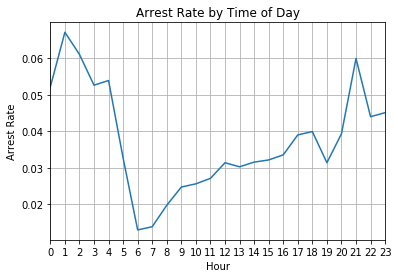

In [65]:
hourly_arrest_rate.plot()
# Add the xlabel, ylabel, and title
plt.xticks(range(0,24))
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.grid()

# Display the plot
plt.show()

### *** Arrest in midnight is HIGH 

### Are drug-related stops on the rise?


In [66]:
df.drugs_related_stop.mean()

0.009915020058928303

In [67]:
annual_drug_rate = df.drugs_related_stop.resample('A').mean()
annual_drug_rate

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

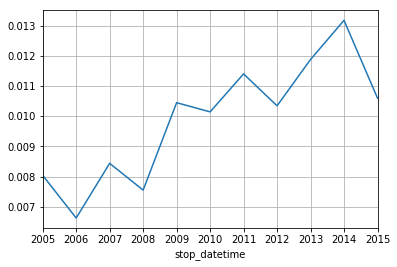

In [68]:

annual_drug_rate.plot();
plt.xticks(annual_drug_rate.index, annual_drug_rate.index.year)
plt.grid()

## Comparing drug and search rates

In [69]:
annual_search_rate=df.search_conducted.resample('A').mean()

In [70]:
annual=pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

In [71]:
annual.head()

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849


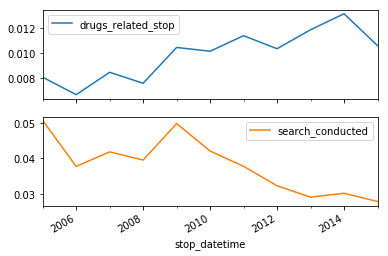

In [72]:
annual.plot(subplots=True);

### *** The rate of drug-related stops increased even though the search rate decreased "

### What violations are caught in each district?


### Tallying violations by district

In [73]:
all_zones=pd.crosstab(df.district, df.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [74]:
k_zones=all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


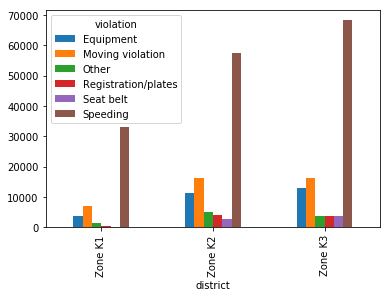

In [75]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

#### Let's stacked theses Bar

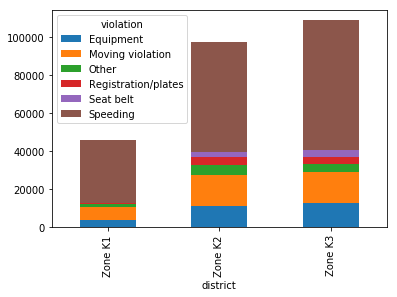

In [76]:
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

# How long might you be stopped for a violation?


In [77]:
# Visualize how often searches were performed after each type of violation
search_rate=df.groupby('violation').search_conducted.mean()
search_rate

violation
Equipment              0.063886
Moving violation       0.054961
Other                  0.046085
Registration/plates    0.089662
Seat belt              0.028669
Speeding               0.020570
Name: search_conducted, dtype: float64

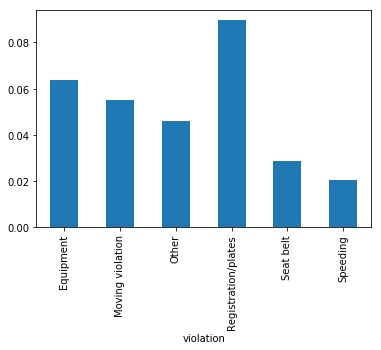

In [78]:
search_rate.plot(kind='bar');

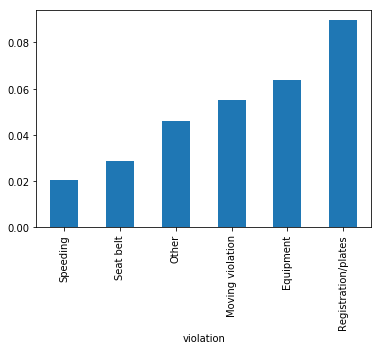

In [79]:
# order the bar by size 
search_rate.sort_values().plot(kind='bar');

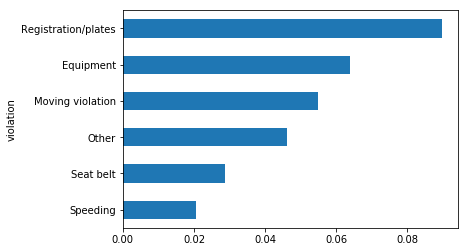

In [80]:
#Rotate it to horizantal 
search_rate.sort_values().plot(kind='barh');

### Converting stop durations to numbers

In [81]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [82]:
# Create a dictionary that maps strings to integers
# 2 minutes and 1 minutes goes to 8 
mapping = {'0-15 Min':8, '16-30 Min':23,'30+ Min':45 , '2':8, '1':8}

#create a new column stop_minutes by converting 'stop_duration'
#strings to integers using mapping dictionary 

df['stop_minutes']=df.stop_duration.map(mapping)

In [83]:
df.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

### Plotting stop length

In [84]:
df.violation_raw.nunique()

12

In [85]:
stop_length=df.groupby('violation_raw').stop_minutes.mean()
stop_length

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454269
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834165
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589195
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

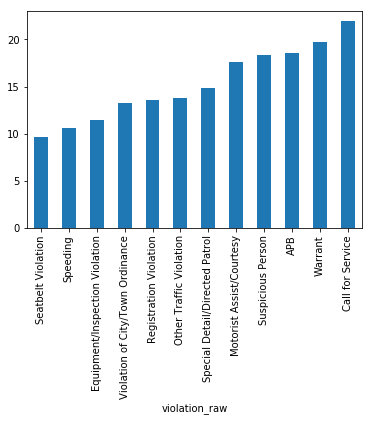

In [86]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='bar')

# Display the plot
plt.show()

#### Let's make it horizontal using kind='barh' argument inside .plot() method

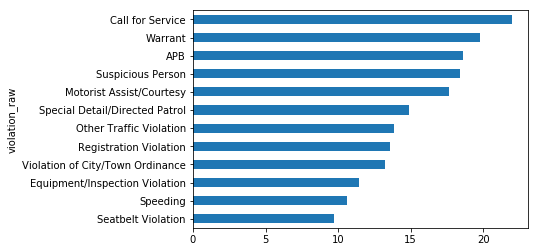

In [87]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

# Is weather information impact on police Behaviour / Activity ? 

In [88]:
weather=pd.read_csv("weather.csv")

In [89]:
weather.head(3)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
weather.shape

(8022, 26)

In [91]:
# Describe the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


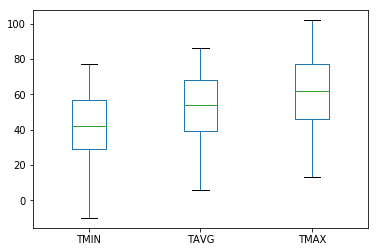

In [92]:
#Create a box plot to visualize the temperature columns.
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box');

In [93]:
# Create a 'TDIFF' column that represents temperature difference

weather['TDIFF']=weather.TMAX - weather.TMIN
# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())



count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64


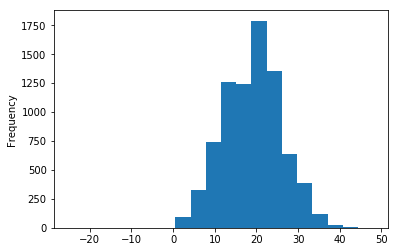

In [94]:
# Create a histogram with 20 bins to visualize 'TDIFF'

weather['TDIFF'].plot(kind='hist', bins=20)
# Display the plot
plt.show()

###  Let's Categorizing the weather 

In [95]:
map_2={'0-15 Min':'short', '16-30 Min':'medium', '30+ Min': 'long', '1': 'short', '2':'short'}

### Make a categorical column name df['stop_length']

In [96]:
df['stop_length']=df.stop_duration.map(map_2)

In [97]:
df['stop_length'].unique()

array(['short', 'medium', 'long'], dtype=object)

In [98]:
df['stop_length'].memory_usage(deep=True)

54671108

#### Let's make it into real category data type

In [99]:
cats=['short', 'medium', 'long']
df['stop_length']=df.stop_length.astype('category', ordered=True, 
                                       categories=cats)

C:\Users\Sabbir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
df['stop_length'].dtype

CategoricalDtype(categories=['short', 'medium', 'long'], ordered=True)

In [101]:
df['stop_length'].memory_usage(deep=True)

25297042

### *** Half of memory less usage in category data type

In [102]:
df.groupby('stop_length').is_arrested.mean()

stop_length
short     0.012999
medium    0.092309
long      0.257325
Name: is_arrested, dtype: float64

### Counting bad weather conditions

 <pre > The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

Let's quantify "how bad" the weather was each day by counting the number of 1 values in each row.

</pre>


In [103]:
temp=weather.loc[:, 'TAVG':'TMIN']

In [104]:
temp.head()

,TAVG,TMAX,TMIN
0,NaN,47.0,28.0
1,NaN,52.0,24.0
2,NaN,48.0,27.0
3,NaN,54.0,40.0
4,NaN,44.0,31.0


In [105]:
#it's sum column wise default
temp.sum()

TAVG     63884.0
TMAX    490283.0
TMIN    336627.0
dtype: float64

In [106]:
# axis='columns' specify the row wise sum
temp.sum(axis='columns').head()

0    75.0
1    76.0
2    75.0
3    94.0
4    75.0
dtype: float64

In [107]:
weather.columns

Index(['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22',
       'TDIFF'],
      dtype='object')

In [108]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

In [109]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

In [110]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

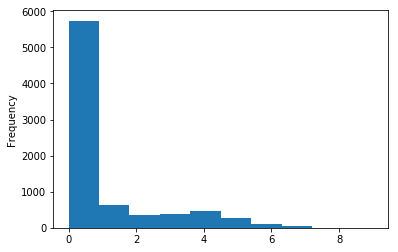

In [111]:
weather['bad_conditions'].plot(kind='hist');

### Let's Rating the weather conditions

<pre> 
The counts range from 0 to 9, and should be converted to ratings as follows:

Convert 0 to 'good'
Convert 1 through 4 to 'bad'
Convert 5 through 9 to 'worse'

</pre>

In [112]:
weather.bad_conditions.value_counts().sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [113]:
# Create a dictionary that maps integers to strings
map_3 = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 
        6:'worse', 7:'worse', 8:'worse', 9:'worse'}


In [114]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(map_3)

In [115]:
weather.rating.unique()

array(['good', 'bad', 'worse'], dtype=object)

In [116]:
weather.rating.value_counts().sort_index()

bad      1852
good     5738
worse     432
Name: rating, dtype: int64

###  Changing the data type to category

In [117]:
cats_2=['good', 'bad', 'worse']
weather['rating']=weather.rating.astype('category', ordered=True, 
                                          categories=cats_2)

C:\Users\Sabbir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [118]:
weather.rating.dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

### Let's merge above two dataframes for furthure investigation

In [119]:
# .reset_index() makes dataframe index into ordinary integer index
df.reset_index(inplace=True)

In [120]:
weather_rating=weather[['DATE', 'rating']]

In [121]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [122]:
df_weather=pd.merge(left=df, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [123]:
df_weather.set_index('stop_datetime', inplace=True)

In [124]:
df_weather.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes,stop_length,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,2005-01-02,01:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1,False,8,short,2005-01-02,good
2005-01-02 01:55:00,2005-01-02,01:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1,False,8,short,2005-01-02,bad
2005-01-02 20:30:00,2005-01-02,20:30,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone X4,False,23,medium,2005-01-02,good
2005-01-02 20:30:00,2005-01-02,20:30,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone X4,False,23,medium,2005-01-02,bad
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,short,2005-01-04,good


### Does weather affect the arrest rate?


In [125]:
df_weather.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district', 'frisk', 'stop_minutes', 'stop_length', 'DATE', 'rating'],
      dtype='object')

### Let's make multi- Index Column

In [126]:
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.054700
                     M                0.103589
Seat belt            F                0.017746
                     M                0.031705
Speeding             F                0.007738
                     M                0.026630
Name: search_conducted, dtype: float64

In [127]:
search_rate_gender=df.groupby(['violation', 'driver_gender']).search_conducted.mean()

In [128]:
search_rate_gender

violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.054700
                     M                0.103589
Seat belt            F                0.017746
                     M                0.031705
Speeding             F                0.007738
                     M                0.026630
Name: search_conducted, dtype: float64

In [129]:
type(search_rate_gender)

pandas.core.series.Series

In [130]:
type(search_rate_gender.index)

pandas.core.indexes.multi.MultiIndex

## Converting a multi-indexed Series to a DataFrame

In [131]:
search_rate_gender.unstack()

driver_gender,F,M
violation,,
Equipment,0.040245,0.070916
Moving violation,0.038021,0.059156
Other,0.045898,0.046120
Registration/plates,0.054700,0.103589
Seat belt,0.017746,0.031705
Speeding,0.007738,0.026630


In [132]:
type(search_rate_gender.unstack())

pandas.core.frame.DataFrame

## Let's Do it in a handsome way

In [133]:
df.pivot_table(index='violation', columns='driver_gender', values='search_conducted')

driver_gender,F,M
violation,,
Equipment,0.040245,0.070916
Moving violation,0.038021,0.059156
Other,0.045898,0.046120
Registration/plates,0.054700,0.103589
Seat belt,0.017746,0.031705
Speeding,0.007738,0.026630


In [134]:
# Calculate the overall arrest rate
print(df_weather.is_arrested.mean())

0.0345715202426788


In [135]:
df_weather.groupby('rating').is_arrested.mean()

rating
good     0.034080
bad      0.035226
worse    0.039360
Name: is_arrested, dtype: float64

In [136]:
arrest_rate_weather=df_weather.groupby(['rating', 'violation']).is_arrested.mean()

In [137]:
arrest_rate_weather

rating  violation          
good    Equipment              0.059125
        Moving violation       0.056805
        Other                  0.080682
        Registration/plates    0.083238
        Seat belt              0.026339
        Speeding               0.013494
bad     Equipment              0.059581
        Moving violation       0.058081
        Other                  0.084950
        Registration/plates    0.092634
        Seat belt              0.028795
        Speeding               0.013348
worse   Equipment              0.094373
        Moving violation       0.062249
        Other                  0.058704
        Registration/plates    0.098673
        Seat belt              0.000000
        Speeding               0.016600
Name: is_arrested, dtype: float64

In [138]:
# access arrest rate for moving violations in bad weather
#from multiindex
arrest_rate_weather.loc['bad','Moving violation' ]

0.0580814717477004

In [139]:
# arrest rates for speeding violations in all
# three weather conditions
arrest_rate_weather.loc[:, 'Speeding']

rating
good     0.013494
bad      0.013348
worse    0.016600
Name: is_arrested, dtype: float64

### Reshaping the arrest_rate_weather data

In [140]:
# Unstack the 'arrest_rate' Series into a DataFrame
arrest_rate_weather.unstack

<bound method Series.unstack of rating  violation          
good    Equipment              0.059125
        Moving violation       0.056805
        Other                  0.080682
        Registration/plates    0.083238
        Seat belt              0.026339
        Speeding               0.013494
bad     Equipment              0.059581
        Moving violation       0.058081
        Other                  0.084950
        Registration/plates    0.092634
        Seat belt              0.028795
        Speeding               0.013348
worse   Equipment              0.094373
        Moving violation       0.062249
        Other                  0.058704
        Registration/plates    0.098673
        Seat belt              0.000000
        Speeding               0.016600
Name: is_arrested, dtype: float64>

In [141]:
df_weather.pivot_table(index='violation', columns='rating', 
                               values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059125,0.059581,0.094373
Moving violation,0.056805,0.058081,0.062249
Other,0.080682,0.084950,0.058704
Registration/plates,0.083238,0.092634,0.098673
Seat belt,0.026339,0.028795,0.000000
Speeding,0.013494,0.013348,0.016600
